In [161]:
import os
import pandas as pd
import numpy as np

In [162]:
# Specify the folder path where the CSV files are located..
path1 = "F:/3014-project/Batch1"
# Create an empty list to store the DataFrames
dataframes1 = []
# Iterate through all files in the folder
for file_name in os.listdir(path1):
    if file_name.endswith(".csv"):
        # Read each CSV file into a DataFrame
        file_path1 = os.path.join(path1, file_name)
        df1= pd.read_csv(file_path1,low_memory=False)
        dataframes1.append(df1)
# Concatenate all DataFrames into a single DataFrame
combine1 = pd.concat(dataframes1, ignore_index=True)
#printing the shape.
print(combine1.shape)

(197132, 75)


In [163]:
# Specify the folder path where the CSV files are located
path2 = "F:/3014-project/Batch2"
# Create an empty list to store the DataFrames
dataframes2 = []
# Iterate through all files in the folder
for file_name in os.listdir(path2):
    if file_name.endswith(".csv"):
        # Read each CSV file into a DataFrame
        file_path2 = os.path.join(path2, file_name)
        df2= pd.read_csv(file_path2,low_memory=False)
        dataframes2.append(df2)
# Concatenate all DataFrames into a single DataFrame
combine2 = pd.concat(dataframes2, ignore_index=True)
print(combine2.shape)

(388021, 75)


In [164]:
# Concatenate all combined dataframes into a single final combined DataFrame
FinalDFList=[]
FinalDFList.append(combine1)
#FinalDFList.append(combine2)
FinalCombo = pd.concat(FinalDFList, ignore_index=True)
print(FinalCombo.shape)
#print(FinalCombo[['host_location']].head(50))

(197132, 75)


In [165]:
#Making CSV from the final dataset
subset_df = FinalCombo.tail(80000)
print(subset_df.shape)

(80000, 75)


In [166]:
#dropping irrelavant columns
subset_df.drop(columns=['id', 'last_scraped', 'listing_url','scrape_id','source','name','description','neighborhood_overview','picture_url','host_id','host_url','host_name','host_since','host_about','host_thumbnail_url','host_picture_url','host_neighbourhood','host_verifications','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','latitude','longitude','bathrooms','bathrooms_text','amenities','calendar_updated','calendar_last_scraped','first_review','last_review','license'],inplace=True)

#remove records having blank host locations
subset_df.dropna(subset=['host_location'], inplace=True)

#check how many Null values we have in each feature
for col in subset_df.columns:
    print(col + ', Number of Missing Values:', len(subset_df[col][subset_df[col].isnull()]))

#fill missing values with mode values of fatures
mode_values = subset_df.mode().iloc[0]
columns_to_fill = subset_df.columns
subset_df[columns_to_fill] = subset_df[columns_to_fill].fillna(mode_values)

print("\n\n")
for col in subset_df.columns:
    print(col + ', Number of Missing Values:', len(subset_df[col][subset_df[col].isnull()]))


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6940\4179539306.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df.drop(columns=['id', 'last_scraped', 'listing_url','scrape_id','source','name','description','neighborhood_overview','picture_url','host_id','host_url','host_name','host_since','host_about','host_thumbnail_url','host_picture_url','host_neighbourhood','host_verifications','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','latitude','longitude','bathrooms','bathrooms_text','amenities','calendar_updated','calendar_last_scraped','first_review','last_review','license'],inplace=True)
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6940\4179539306.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docu

host_location, Number of Missing Values: 0
host_response_time, Number of Missing Values: 10355
host_response_rate, Number of Missing Values: 10355
host_acceptance_rate, Number of Missing Values: 6611
host_is_superhost, Number of Missing Values: 9138
host_listings_count, Number of Missing Values: 0
host_total_listings_count, Number of Missing Values: 0
host_has_profile_pic, Number of Missing Values: 0
host_identity_verified, Number of Missing Values: 0
property_type, Number of Missing Values: 0
room_type, Number of Missing Values: 0
accommodates, Number of Missing Values: 0
bedrooms, Number of Missing Values: 13563
beds, Number of Missing Values: 674
price, Number of Missing Values: 0
minimum_nights, Number of Missing Values: 0
maximum_nights, Number of Missing Values: 0
minimum_minimum_nights, Number of Missing Values: 14
maximum_minimum_nights, Number of Missing Values: 14
minimum_maximum_nights, Number of Missing Values: 14
maximum_maximum_nights, Number of Missing Values: 14
minimum

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6940\4179539306.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[columns_to_fill] = subset_df[columns_to_fill].fillna(mode_values)





host_location, Number of Missing Values: 0
host_response_time, Number of Missing Values: 0
host_response_rate, Number of Missing Values: 0
host_acceptance_rate, Number of Missing Values: 0
host_is_superhost, Number of Missing Values: 0
host_listings_count, Number of Missing Values: 0
host_total_listings_count, Number of Missing Values: 0
host_has_profile_pic, Number of Missing Values: 0
host_identity_verified, Number of Missing Values: 0
property_type, Number of Missing Values: 0
room_type, Number of Missing Values: 0
accommodates, Number of Missing Values: 0
bedrooms, Number of Missing Values: 0
beds, Number of Missing Values: 0
price, Number of Missing Values: 0
minimum_nights, Number of Missing Values: 0
maximum_nights, Number of Missing Values: 0
minimum_minimum_nights, Number of Missing Values: 0
maximum_minimum_nights, Number of Missing Values: 0
minimum_maximum_nights, Number of Missing Values: 0
maximum_maximum_nights, Number of Missing Values: 0
minimum_nights_avg_ntm, Numb

In [167]:
#checking for feature types
for col in subset_df.columns:
    data_type = subset_df[col].dtype
    print(f"The data type of column '{col}' is {data_type}.")

The data type of column 'host_location' is object.
The data type of column 'host_response_time' is object.
The data type of column 'host_response_rate' is object.
The data type of column 'host_acceptance_rate' is object.
The data type of column 'host_is_superhost' is object.
The data type of column 'host_listings_count' is float64.
The data type of column 'host_total_listings_count' is float64.
The data type of column 'host_has_profile_pic' is object.
The data type of column 'host_identity_verified' is object.
The data type of column 'property_type' is object.
The data type of column 'room_type' is object.
The data type of column 'accommodates' is int64.
The data type of column 'bedrooms' is float64.
The data type of column 'beds' is float64.
The data type of column 'price' is object.
The data type of column 'minimum_nights' is int64.
The data type of column 'maximum_nights' is int64.
The data type of column 'minimum_minimum_nights' is float64.
The data type of column 'maximum_minimum_

In [168]:
#preprocess the features needed
subset_df["host_response_rate"] = subset_df["host_response_rate"].str.replace("%", "")
subset_df["host_acceptance_rate"] = subset_df["host_acceptance_rate"].str.replace("%", "")
subset_df["price"] = subset_df["price"].str.replace("$", "")

#change the feature types
subset_df['host_location'] = subset_df['host_location'].astype(pd.StringDtype())
subset_df['host_response_time'] = subset_df['host_response_time'].astype(pd.StringDtype())
subset_df['host_is_superhost'] = subset_df['host_is_superhost'].astype(pd.StringDtype())
subset_df['host_has_profile_pic'] = subset_df['host_has_profile_pic'].astype(pd.StringDtype())
subset_df['host_identity_verified'] = subset_df['host_identity_verified'].astype(pd.StringDtype())
subset_df['property_type'] = subset_df['property_type'].astype(pd.StringDtype())
subset_df['room_type'] = subset_df['room_type'].astype(pd.StringDtype())
subset_df['has_availability'] = subset_df['has_availability'].astype(pd.StringDtype())
subset_df['instant_bookable'] = subset_df['instant_bookable'].astype(pd.StringDtype())
subset_df['price'] = pd.to_numeric(subset_df["price"], errors='coerce').astype(pd.Int64Dtype())
subset_df["host_response_rate"] = pd.to_numeric(subset_df["host_response_rate"], errors='coerce').astype(pd.Int64Dtype())
subset_df["host_acceptance_rate"] = pd.to_numeric(subset_df["host_acceptance_rate"], errors='coerce').astype(pd.Int64Dtype())

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6940\3132594822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["host_response_rate"] = subset_df["host_response_rate"].str.replace("%", "")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6940\3132594822.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df["host_acceptance_rate"] = subset_df["host_acceptance_rate"].str.replace("%", "")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6940\3132594822.py:4: FutureWarning: The default value of regex

In [169]:
#checking for feature types
for col in subset_df.columns:
    data_type = subset_df[col].dtype
    print(f"The data type of column '{col}' is {data_type}.")

The data type of column 'host_location' is string.
The data type of column 'host_response_time' is string.
The data type of column 'host_response_rate' is Int64.
The data type of column 'host_acceptance_rate' is Int64.
The data type of column 'host_is_superhost' is string.
The data type of column 'host_listings_count' is float64.
The data type of column 'host_total_listings_count' is float64.
The data type of column 'host_has_profile_pic' is string.
The data type of column 'host_identity_verified' is string.
The data type of column 'property_type' is string.
The data type of column 'room_type' is string.
The data type of column 'accommodates' is int64.
The data type of column 'bedrooms' is float64.
The data type of column 'beds' is float64.
The data type of column 'price' is Int64.
The data type of column 'minimum_nights' is int64.
The data type of column 'maximum_nights' is int64.
The data type of column 'minimum_minimum_nights' is float64.
The data type of column 'maximum_minimum_nig

In [170]:
#remove duplicates
print(subset_df)
subset_df = subset_df.drop_duplicates()
print(subset_df)

                     host_location  host_response_time  host_response_rate  \
117133            Bordeaux, France      within an hour                  94   
117134            Bordeaux, France        within a day                  88   
117135               Paris, France  within a few hours                 100   
117136            Bordeaux, France      within an hour                 100   
117138            Bordeaux, France      within an hour                 100   
...                            ...                 ...                 ...   
197125     Cape Town, South Africa      within an hour                 100   
197126     Cape Town, South Africa      within an hour                 100   
197127        Benoni, South Africa      within an hour                 100   
197129  Johannesburg, South Africa      within an hour                 100   
197130     Cape Town, South Africa      within an hour                 100   

        host_acceptance_rate host_is_superhost  host_listings_c

In [171]:
#differentiate categorical and numerical columns
numeric_columns = subset_df.select_dtypes(include=['int64', 'float64','Int64','Float64']).columns
categorical_columns = set(subset_df.columns) - set(numeric_columns)
print("numeric_columns-->",numeric_columns)
print("categorical_columns-->",categorical_columns)
print(subset_df.shape)

numeric_columns--> Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtyp

In [172]:


#Handling the Outliers using IQR
# Calculate the IQR for each column
for cols in numeric_columns:
    Q1 = subset_df[cols].quantile(0.25)
    Q3 = subset_df[cols].quantile(0.75)
    IQR = Q3 - Q1

    # Define the threshold for outliers
    threshold = 1.5

    # Identify rows with outliers
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    outliers = (subset_df[cols] < lower_bound) | (subset_df[cols] > upper_bound)

    # Remove rows with outliers
    subset_df = subset_df[~outliers]

print(subset_df.shape)
# Now df_encoded contains the DataFrame with outliers removed

(4135, 44)


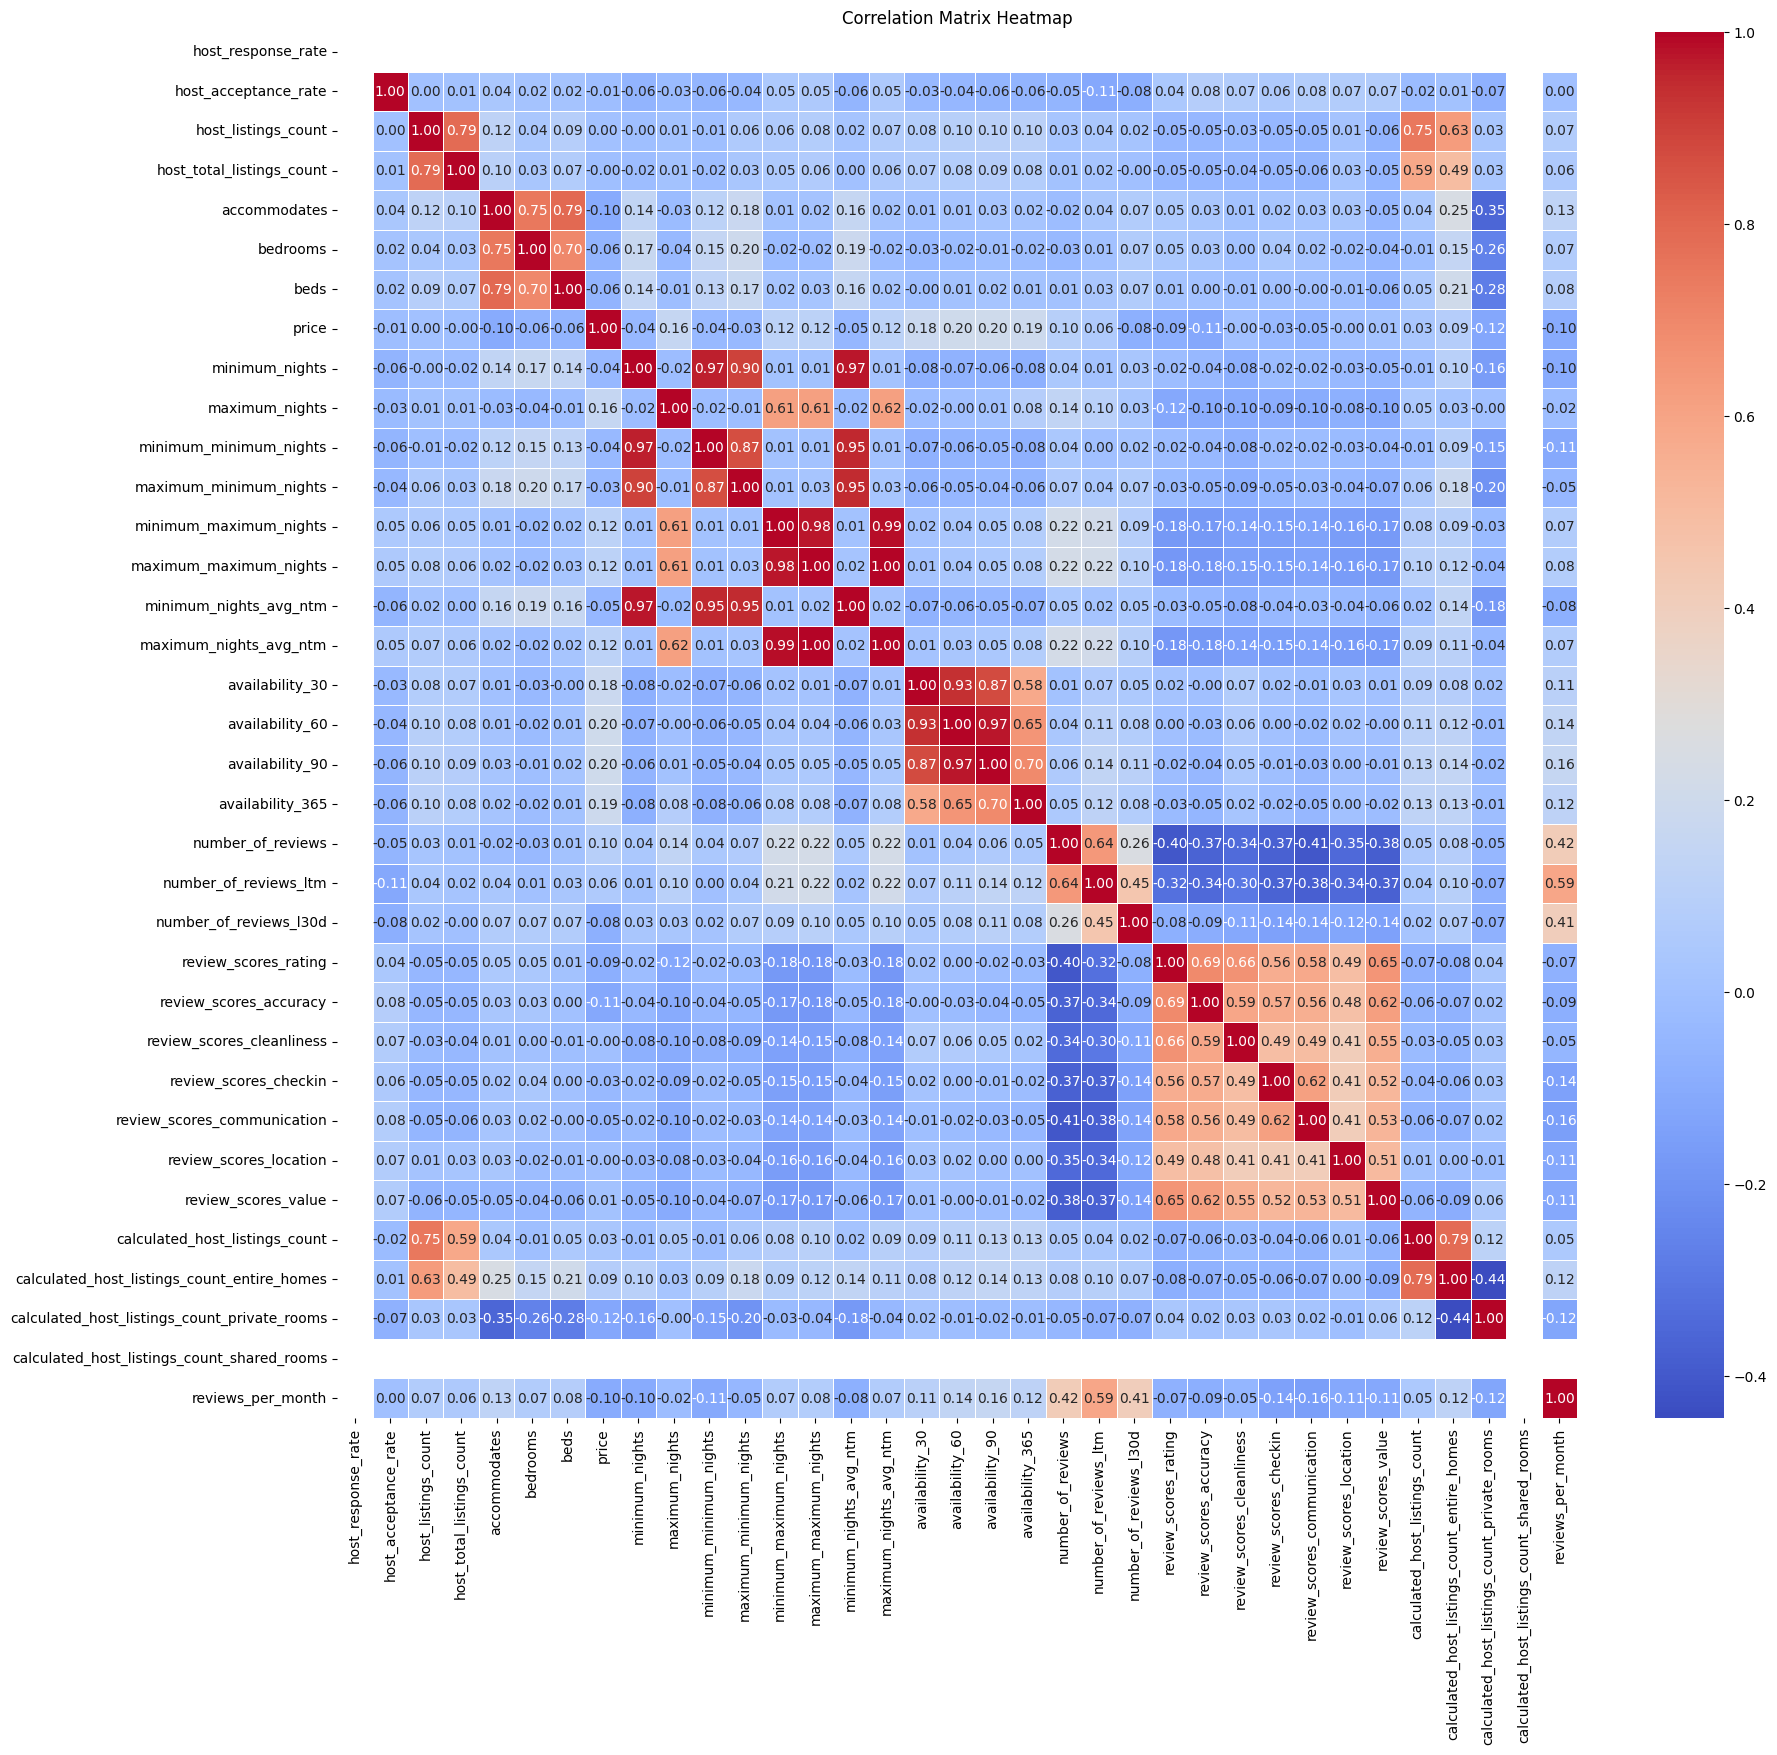

column names having correlation with price greater than 0.2-->
 price
column names having correlation with price greater than 0.2-->
 availability_60
column names having correlation with price greater than 0.2-->
 availability_90


In [173]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the Correlation Matrix for Numerical and boolean Columns
correlation_matrix = subset_df[numeric_columns].corr()

#Visualize the correlation matrix as a heatmap
plt.figure(figsize=(20,18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

corr_cols = correlation_matrix[abs(correlation_matrix['price']) > 0.2].index
for i in corr_cols:
    print("column names having correlation with price greater than 0.2-->\n",i)

In [174]:
#OH encoding on features
prefix_dict = {
    'room_type':'en_room_type_',
    'host_identity_verified':'en_id_ver_',
    'host_response_time':'en_res_time_',
    'host_is_superhost':'en_issuperhost_',
    'has_availability':'en_available_',
    'instant_bookable':'en_bookable_',
    'property_type':'en_prop_type_',
    'host_has_profile_pic':'en_profilepic_'
}
cat_col=list(categorical_columns)
cat_col = [x for x in cat_col if x != 'host_location']
df_encoded = pd.get_dummies(subset_df, prefix=prefix_dict, columns=cat_col)
print(df_encoded)

                  host_location  host_response_rate  host_acceptance_rate  \
117135            Paris, France                 100                    95   
117149         Bordeaux, France                 100                    87   
117158          Floirac, France                 100                    91   
117171         Bordeaux, France                 100                   100   
117179                    Malta                 100                   100   
...                         ...                 ...                   ...   
197081  Cape Town, South Africa                 100                   100   
197092  Cape Town, South Africa                 100                   100   
197113  Cape Town, South Africa                 100                   100   
197118  Cape Town, South Africa                 100                   100   
197119  Cape Town, South Africa                 100                    81   

        host_listings_count  host_total_listings_count  accommodates  \
117

In [175]:
df_encoded.to_csv("AirBnbupdated.csv",index=True)
df_encoded.head()

,host_location,host_response_rate,host_acceptance_rate,host_listings_count,host_total_listings_count,accommodates,bedrooms,beds,price,minimum_nights,...,en_prop_type__Room in serviced apartment,en_prop_type__Shipping container,en_prop_type__Tiny home,en_room_type__Entire home/apt,en_room_type__Hotel room,en_room_type__Private room,en_id_ver__f,en_id_ver__t,en_available__f,en_available__t
117135,"Paris, France",100,95,2.0,2.0,6,3.0,3.0,450,5,...,0,0,0,1,0,0,0,1,0,1
117149,"Bordeaux, France",100,87,2.0,2.0,4,2.0,2.0,135,2,...,0,0,0,1,0,0,0,1,0,1
117158,"Floirac, France",100,91,2.0,4.0,4,2.0,3.0,141,4,...,0,0,0,1,0,0,0,1,0,1
117171,"Bordeaux, France",100,100,1.0,1.0,2,1.0,1.0,90,3,...,0,0,0,1,0,0,0,1,0,1
117179,Malta,100,100,1.0,2.0,2,1.0,1.0,45,3,...,0,0,0,0,0,1,0,1,0,1


In [176]:
# explore distribution of accommodates.
value_counts = subset_df['accommodates'].value_counts()

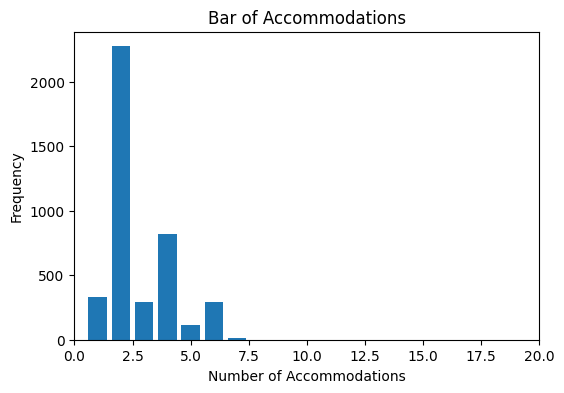

In [177]:
# visualize distribution of accommodates
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.bar(value_counts.index, value_counts.values)
plt.xlabel('Number of Accommodations')
plt.ylabel('Frequency')
plt.title('Bar of Accommodations')
plt.xlim(0, 20)
plt.show()


**As we can see that most of the accomodates are of 1-4 people so now we will go for bed plotting**



In [178]:
# explore distribution of beds
value_counts1 = subset_df['beds'].value_counts()

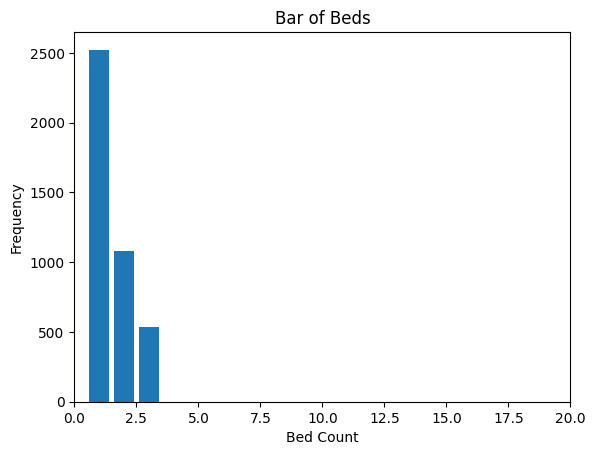

In [179]:
# visualize distribution of beds
import matplotlib.pyplot as plt
plt.bar(value_counts1.index, value_counts1.values)
plt.xlabel('Bed Count')
plt.ylabel('Frequency')
plt.title('Bar of Beds')
plt.xlim(0, 20)
plt.show()

**Here we can see that mostly single bed rooms are getting purchased**

In [180]:
print(df_encoded.shape)

(4135, 106)


In [181]:
#again taking numerical columns only after OH encoding
numcols = df_encoded.select_dtypes(include=['int64', 'float64','Int64','Float64']).columns
print(numcols)

Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month'],
      dtype='object')


Data scaling starts here

In [182]:
#scaling of data
from sklearn.preprocessing import StandardScaler

# Create a DataFrame to store scaled values
scaled_df = df_encoded.copy()

# Perform scaling on the columns_to_process
scaler = StandardScaler()

# Fit the scaler on the selected columns and transform the data
scaled_values = scaler.fit_transform(df_encoded[numcols])

# Update the scaled values in the scaled_df DataFrame
scaled_df[numcols] = scaled_values
print(scaled_df.shape)

(4135, 106)


Data normalization starts here

In [183]:
from sklearn.preprocessing import MinMaxScaler

# Create a DataFrame to store normalized values
normalized_df = scaled_df.copy()

# Perform normalization on the numcols
scaler = MinMaxScaler()

# Fit the scaler on the selected columns and transform the data
normalized_values = scaler.fit_transform(scaled_df[numcols])

# Update the normalized values in the normalized_df DataFrame
normalized_df[numcols] = normalized_values

Dimensionality reduction starts here using PCA (Pricipal Component Analysis)

In [184]:
from sklearn.decomposition import PCA

# Initialize PCA
pca = PCA()

# Fit PCA on the normalized data
pca.fit(normalized_df[numcols])

# Calculate cumulative explained variance ratio
explained_variance_ratio_cumulative = pca.explained_variance_ratio_.cumsum()

# Determine the number of components needed for a desired explained variance threshold
desired_explained_variance = 0.95  #desired threshold [high info retention-[0.95 or above], balanced-[0.85-0.90], aggresive DR-[0.70-0.80]]
n_components = next(i for i, ratio in enumerate(explained_variance_ratio_cumulative, start=1) if ratio >= desired_explained_variance)

print(f"Number of components needed for {desired_explained_variance:.0%} explained variance: {n_components}")

Number of components needed for 95% explained variance: 17


so we will take 17 as n_components

In [185]:
numcols = normalized_df.select_dtypes(include=['int64', 'float64','Int64','Float64']).columns
# Select columns that are not in numcols
catcols = normalized_df.loc[:, ~normalized_df.columns.isin(numcols)]
print(catcols)


# Print data types of columns in catcols
for col in catcols.columns:
    print(f"Column '{col}' has data type: {catcols[col].dtype}")



                  host_location  en_res_time__a few days or more  \
117135            Paris, France                                0   
117149         Bordeaux, France                                0   
117158          Floirac, France                                0   
117171         Bordeaux, France                                0   
117179                    Malta                                0   
...                         ...                              ...   
197081  Cape Town, South Africa                                0   
197092  Cape Town, South Africa                                0   
197113  Cape Town, South Africa                                0   
197118  Cape Town, South Africa                                0   
197119  Cape Town, South Africa                                0   

        en_res_time__within a day  en_res_time__within a few hours  \
117135                          0                                1   
117149                          0          

In [186]:
# Convert categorical columns to boolean arrays using pd.get_dummies()
#catcols_boolean = pd.get_dummies(catcols, dtype=bool)

# Convert categorical columns to boolean arrays
for col in catcols.columns:
    if catcols[col].dtype == 'object' or catcols[col].dtype == 'uint8' :
        catcols.loc[:,col] = catcols[col].astype(pd.BooleanDtype())

# Print data types of columns in catcols
for col in catcols.columns:
    print(f"Column '{col}' has data type: {catcols[col].dtype}")

Column 'host_location' has data type: string
Column 'en_res_time__a few days or more' has data type: boolean
Column 'en_res_time__within a day' has data type: boolean
Column 'en_res_time__within a few hours' has data type: boolean
Column 'en_res_time__within an hour' has data type: boolean
Column 'en_profilepic__f' has data type: boolean
Column 'en_profilepic__t' has data type: boolean
Column 'en_issuperhost__f' has data type: boolean
Column 'en_issuperhost__t' has data type: boolean
Column 'en_bookable__f' has data type: boolean
Column 'en_bookable__t' has data type: boolean
Column 'en_prop_type__Boat' has data type: boolean
Column 'en_prop_type__Camper/RV' has data type: boolean
Column 'en_prop_type__Casa particular' has data type: boolean
Column 'en_prop_type__Dome' has data type: boolean
Column 'en_prop_type__Entire bungalow' has data type: boolean
Column 'en_prop_type__Entire cabin' has data type: boolean
Column 'en_prop_type__Entire chalet' has data type: boolean
Column 'en_prop_

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_6940\1967254583.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  catcols.loc[:,col] = catcols[col].astype(pd.BooleanDtype())


In [187]:
for col in numcols:
    print(f"Column '{col}' has data type: {normalized_df[col].dtype}")

Column 'host_response_rate' has data type: float64
Column 'host_acceptance_rate' has data type: float64
Column 'host_listings_count' has data type: float64
Column 'host_total_listings_count' has data type: float64
Column 'accommodates' has data type: float64
Column 'bedrooms' has data type: float64
Column 'beds' has data type: float64
Column 'price' has data type: float64
Column 'minimum_nights' has data type: float64
Column 'maximum_nights' has data type: float64
Column 'minimum_minimum_nights' has data type: float64
Column 'maximum_minimum_nights' has data type: float64
Column 'minimum_maximum_nights' has data type: float64
Column 'maximum_maximum_nights' has data type: float64
Column 'minimum_nights_avg_ntm' has data type: float64
Column 'maximum_nights_avg_ntm' has data type: float64
Column 'availability_30' has data type: float64
Column 'availability_60' has data type: float64
Column 'availability_90' has data type: float64
Column 'availability_365' has data type: float64
Column '

In [188]:
data = normalized_df[numcols]

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


# Create a PCA model with the desired number of components (e.g., 17)
num_components = 17
pca = PCA(n_components=num_components)

# Fit the PCA model to the scaled data
pca.fit(scaled_data)

# Transform the data to its principal components
principal_components = pca.transform(scaled_data)

# Create a new DataFrame with the principal components
pc_columns = [f'PC{i+1}' for i in range(num_components)]
pc_df = pd.DataFrame(data=principal_components, columns=pc_columns)

# Concatenate the principal components DataFrame with the original DataFrame
result_df = pd.concat([normalized_df, pc_df], axis=1)


In [189]:
print(result_df)

           host_location  host_response_rate  host_acceptance_rate  \
117135     Paris, France                 0.0                  0.75   
117149  Bordeaux, France                 0.0                  0.35   
117158   Floirac, France                 0.0                  0.55   
117171  Bordeaux, France                 0.0                  1.00   
117179             Malta                 0.0                  1.00   
...                  ...                 ...                   ...   
4130                <NA>                 NaN                   NaN   
4131                <NA>                 NaN                   NaN   
4132                <NA>                 NaN                   NaN   
4133                <NA>                 NaN                   NaN   
4134                <NA>                 NaN                   NaN   

        host_listings_count  host_total_listings_count  accommodates  \
117135             0.071429                       0.05      0.857143   
117149         

In [190]:
from sklearn.preprocessing import OneHotEncoder

#seperating Features and target variables
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

normalized_df = normalized_df.drop(columns = ['host_location'])

print(normalized_df.columns)


n_comps = 17
pca = PCA(n_components=n_comps)
pca_result = pca.fit_transform( string_column_df.loc[:, normalized_df.columns != 'price'])


# Create a DataFrame to store PCA results
pca_df = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(n_comps)])

print(pca_df)

# Make a copy of the catcols DataFrame
catcols_copy = catcols.copy()

# Exclude the string column from catcols_copy
catcols_copy = catcols_copy.drop(columns=['host_location'])




# Concatenate PCA results with categorical columns from normalized_df and the encoded string column
final_pca_df = pd.concat([string_column_df, catcols_copy, pca_df], axis=1)

# Ensure all columns are in numeric format
final_pca_df = final_pca_df.apply(pd.to_numeric, errors='ignore')

#Now final_pca_df contains the PCA results along with categorical columns, including the encoded string column
print(final_pca_df.columns)




Index(['host_response_rate', 'host_acceptance_rate', 'host_listings_count',
       'host_total_listings_count', 'accommodates', 'bedrooms', 'beds',
       'price', 'minimum_nights', 'maximum_nights',
       ...
       'en_prop_type__Room in serviced apartment',
       'en_prop_type__Shipping container', 'en_prop_type__Tiny home',
       'en_room_type__Entire home/apt', 'en_room_type__Hotel room',
       'en_room_type__Private room', 'en_id_ver__f', 'en_id_ver__t',
       'en_available__f', 'en_available__t'],
      dtype='object', length=105)


IndexError: Boolean index has wrong length: 105 instead of 372

In [ ]:
X = final_pca_df
Y = normalized_df['price']

#splitting in train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.2, random_state=42)

ValueError: Found input variables with inconsistent numbers of samples: [8270, 4135]

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize and train the model on the scaled training data
print("\nLR")
LR_model = LinearRegression()
LR_model.fit(X_train_scaled, y_train)
y_train_pred =LR_model.predict(X_train_scaled)
y_test_pred =LR_model.predict(X_test_scaled)
# Calculate Mean Squared Error (MSE) for train and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("\nTrain MSE:", train_mse)
print("\nTest MSE:", test_mse)
# Calculate R-squared for train and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("\nTrain R-squared:", train_r2)
print("\nTest R-squared:", test_r2)


LR


NameError: name 'X_train_scaled' is not defined

In [ ]:
from sklearn.linear_model import ElasticNet
# Initialize and train the model on the scaled training data
print("\nElasticNET")
En_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
En_model.fit(X_train_scaled, y_train)
y_train_pred =En_model.predict(X_train_scaled)
y_test_pred =En_model.predict(X_test_scaled)
# Calculate Mean Squared Error (MSE) for train and test sets
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
print("\nTrain MSE:", train_mse)
print("\nTest MSE:", test_mse)
# Calculate R-squared for train and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)
print("\nTrain R-squared:", train_r2)
print("\nTest R-squared:", test_r2)


ElasticNET

Train MSE: 4591.717373552002

Test MSE: 4987.608915346699

Train R-squared: 0.18396463114235073

Test R-squared: 0.11274888607848821
